In [266]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
import pandas as pd

df = pd.read_csv("/content/NB1 - Diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [268]:
#Task : Use the drop method to remove the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [269]:
#Task : From the dataframe df, extract a matrice X (the features) and a vector y (the target). Then use train_test_split to split X and y into training and test sets.
X,y = df[['x','y','z','table','depth','carat']],df['price']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
#Task : Using the LinearRegression class, fit a model on the training set. Then use the predict method to make predictions on the test set and print out performance for both metrics.
model = LinearRegression()

In [272]:
model_fit = model.fit(X_train, y_train)

In [273]:
y_pred = model.predict(X_test)

In [274]:
#Task : Interpret the results you just got, and then compute the performance of a very simple baseline model for comparison.
MAE = mean_absolute_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

In [275]:
MAE

888.480863390105

In [276]:
RMSE

1497.3906985438382

In [277]:
MSE

2242178.9040856035

In [278]:
#Task : Use the isna method together with sum to check for missing values in the dataset and interpret.
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [279]:
#Task : Use the describe method to examine the distributions of the numerical variables, and then interpret the results.
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [280]:
#Task: Display all observations where at least one of the three dimension variables is equal to 0.
df[(df['x']==0) | (df['y']==0) | (df['z']==0)]
#Task: Remove these observations, and report the dataset size before and after the cleanup.
df.filter(like='0',axis=0)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
20,0.30,Good,I,SI2,63.3,56.0,351,4.26,4.30,2.71
30,0.23,Very Good,F,VS1,60.0,57.0,402,4.00,4.03,2.41
40,0.33,Ideal,I,SI2,61.2,56.0,403,4.49,4.50,2.75
...,...,...,...,...,...,...,...,...,...,...
53908,0.70,Very Good,E,SI1,61.2,57.0,2753,5.68,5.73,3.49
53909,0.70,Very Good,E,SI1,62.7,59.0,2753,5.63,5.67,3.54
53910,0.70,Premium,E,SI1,60.5,58.0,2753,5.74,5.77,3.48
53920,0.70,Very Good,E,VS2,62.4,60.0,2755,5.57,5.61,3.49


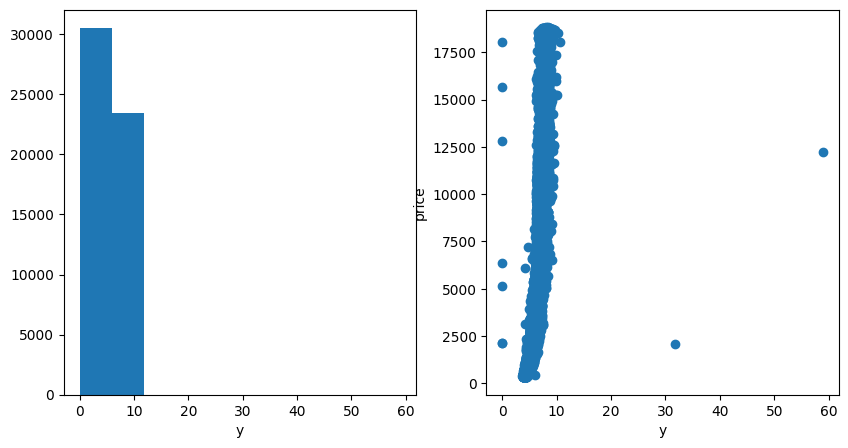

In [281]:
#Task: Build a function explore_column with the following parameters:
#df: the dataframe containing the columns of interest
#column: the name of the column you want to inspect
#target_column: the name of the target column

# df: the dataframe containing the columns of interest
# column: the name of the column you want to inspect
# target_column: the name of the target column

def explore_column(df,column,target_column):
  fig = plt.figure(figsize=(10,5))
  ax1 = fig.add_subplot(121)
  ax1.hist(df[column])
  ax1.set_xlabel(column)
  ax2 = fig.add_subplot(122)
  ax2.scatter(df[column],df[target_column])
  ax2.set_xlabel(column)
  ax2.set_ylabel(target_column)


explore_column(df,'y','price')



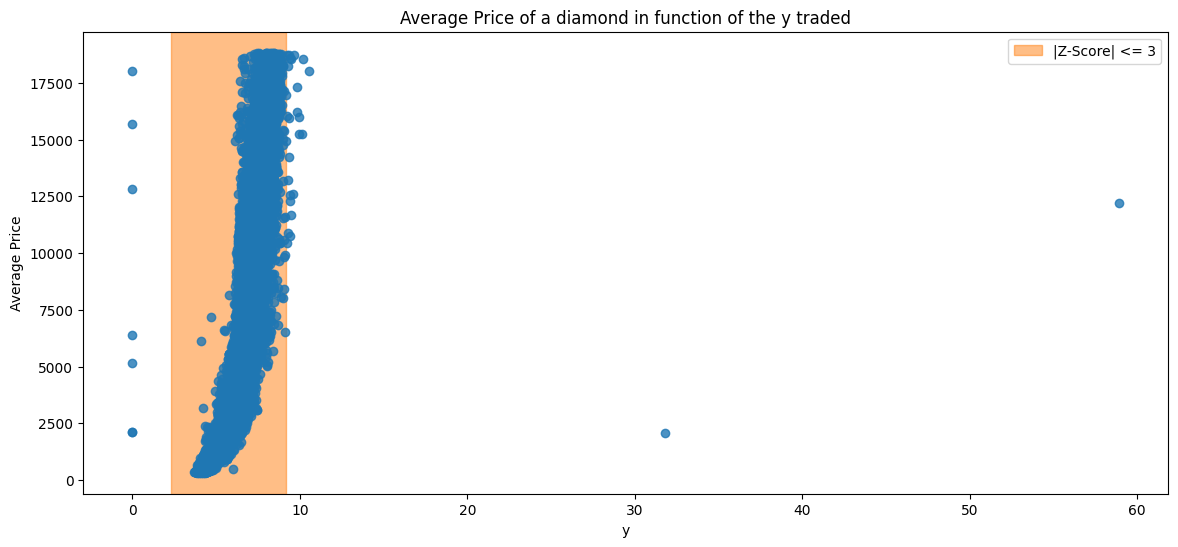

Number of observations before cleanup: 53940
Number of observations after cleanup: 53906


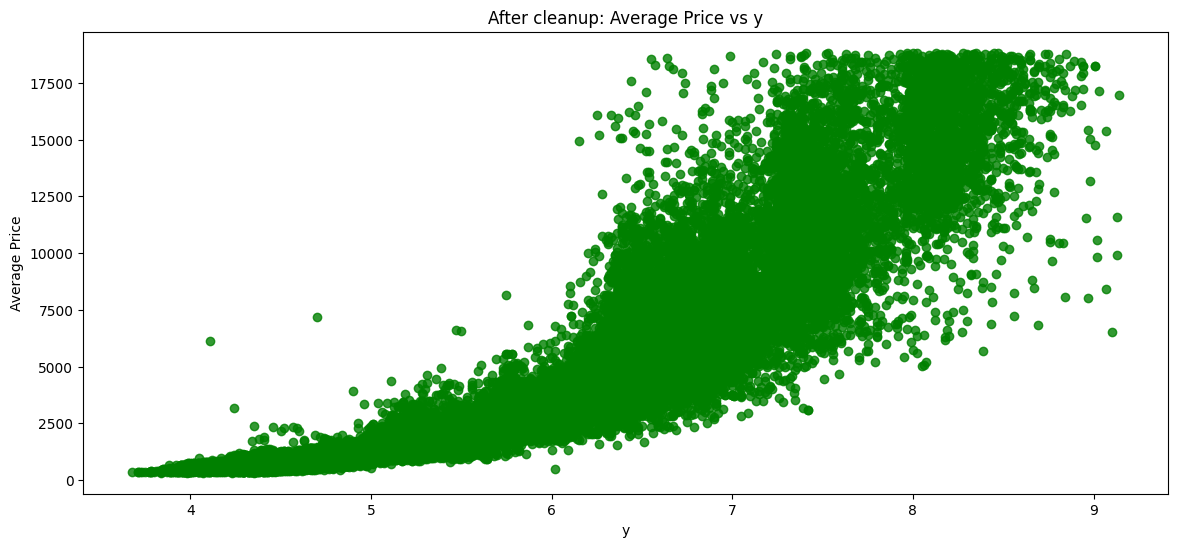

In [282]:
#Task : Remove the outliers from the y column, then explore the other columns as needed. Make sure to print the number of observations before and after the cleanup.
#Before acting on outliers, we need to identify them. We are going to cover some statistical methods :

# Univariate methods : Z-Score and Interquartile range
# Multivariate method : Mahalanobis distance
# Anomaly detection : Isolation Forest algorithm
#https://github.com/theo-lq/ML-IF-STIN/blob/master/Bonus/Outliers/HandlingOutliers.ipynb

#among three methods I used z score here

def z_score_meth(df,column):
  mean, std = df[column].mean(), df[column].std()
  alpha = 3
  threshold_down, threshold_up = mean - alpha * std, mean + alpha * std

  plt.figure(figsize=(14, 6))
  plt.axvspan(threshold_down, threshold_up, alpha=0.5, color=sns.color_palette()[1], label=f"|Z-Score| <= {alpha}")
  plt.scatter(df[column], df["price"], alpha=0.8)

  plt.title(f"Average Price of a diamond in function of the {column} traded")
  plt.xlabel(column)
  plt.ylabel("Average Price")
  plt.legend()
  plt.show()

  df_clean = df[(df[column] >= threshold_down) & (df[column] <= threshold_up)]
  print(f"Number of observations before cleanup: {df.shape[0]}")
  print(f"Number of observations after cleanup: {df_clean.shape[0]}")

  # Plot after cleanup
  plt.figure(figsize=(14, 6))
  plt.scatter(df_clean[column], df_clean["price"], alpha=0.8, color='green')
  plt.title(f"After cleanup: Average Price vs {column}")
  plt.xlabel(column)
  plt.ylabel("Average Price")
  plt.show()



z_score_meth(df,'y')


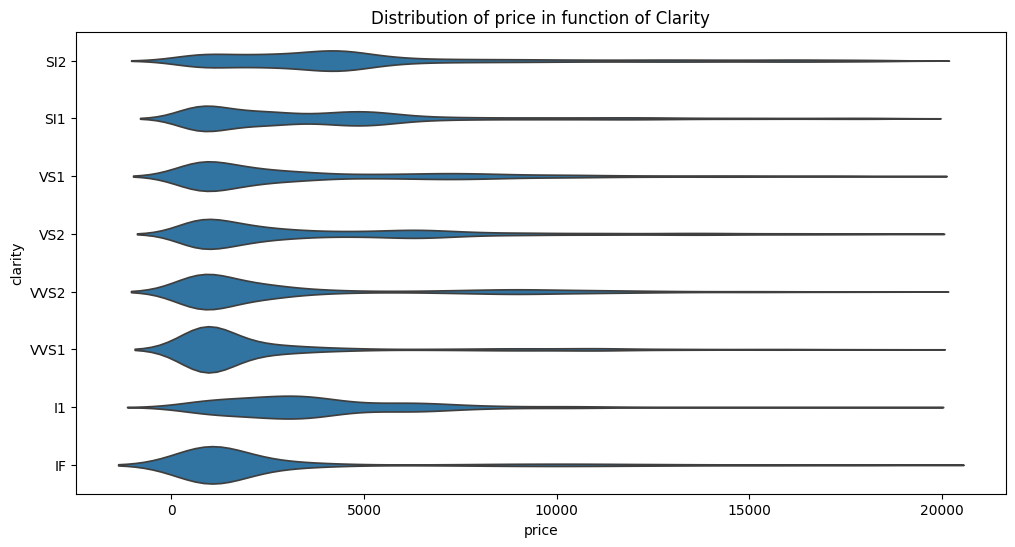

In [283]:
#Next, we need to handle the categorical variables. A good way to explore them is with a violin plot.

def make_violin_plot(column, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.violinplot(data=df, x="price", y=column, inner=None)
    plt.title("Distribution of price in function of %s" % column.capitalize())
    plt.show()

make_violin_plot("clarity")

In [284]:
df_cleaned = pd.get_dummies(df,columns=['cut','color','clarity'],drop_first=True)

In [285]:
X = df_cleaned.drop("price", axis=1)
y = df_cleaned["price"]

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [287]:
model_fit = model.fit(X_train, y_train)

In [288]:
y_pred_cleaned= model.predict(X_test)

In [289]:
MAE_cleaned = mean_absolute_error(y_test, y_pred_cleaned)
RMSE_cleaned = root_mean_squared_error(y_test, y_pred_cleaned)
MSE_cleaned = mean_squared_error(y_test, y_pred_cleaned)

In [290]:
print("MAE_cleaned= ", MAE_cleaned, "MAE=", MAE)

MAE_cleaned=  737.1513665933265 MAE= 888.480863390105


In [291]:
print("RMSE_cleaned= ", RMSE_cleaned, "RMSE=", RMSE)

RMSE_cleaned=  1135.2116445190625 RMSE= 1497.3906985438382


In [292]:
print("MSE_cleaned= ", MSE_cleaned, "MSE=", MSE)

MSE_cleaned=  1288705.4778516742 MSE= 2242178.9040856035


In [293]:
#Task: Define a function named train_predict with the following parameters:

# X: feature matrix
# y: target vector
# metric: a performance metric

def train_predict(X,y,metric):
  #The function should generalize the code from the previous cell so it can be reused for different preprocessing steps.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model_fit = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  metric_value = metric(y_test, y_pred)
  return metric_value



In [294]:
#Task : Write a cell that measure performance at each key steps of the notebook.
train_predict(X,y,mean_absolute_error)


737.1513665933265